In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import control as ctl

class Bode():
    def __init__(self, G, freq_range = [-2, 2]):
        self.G = G

        # Hacky fix
        # sometimes signal.TransferFunction has better properties
        self.sys = signal.TransferFunction(G.num[0][0], G.den[0][0])

        # Compute frequency response
        self.w, self.mag, self.phase = signal.bode(self.sys, np.logspace(freq_range[0], freq_range[1], 1000))


        # Compute w_BW
        self.w_BW = self.compute_w_BW()

        # Compute w_C
        self.w_C = self.compute_w_C()

        # Compute PM
        self.PM = self.compute_PM()

        # Compute GM
        self.GM = self.compute_GM()

    def __str__(self):
        # Print transfer function
        w_BW_message = 'w_BW = {:.2f} rad/s'.format(self.w_BW)
        w_C_message = 'w_C = {:.2f} rad/s'.format(self.w_C)
        PM_message = 'PM = {:.2f} degrees'.format(self.PM)
        GM_message = 'GM = {:.2f}'.format(self.GM)

        return f'SYSTEM PROPERTIES for {self.G}\n\n' \
                + w_BW_message + '\n' \
                + w_C_message + '\n' \
                + PM_message + '\n' \
                + GM_message
    
    def compute_GM(self):
        ''' 
        Defined as the inverse of |KG(j omega)| when
        angle G(j omega) = -180 degrees
        '''
        try:
            # Find index when phase is -180 degrees
            index = np.where(self.phase < -180)[0][0]

            # Compute the magnitude at this index
            mag = self.mag[index]

            # # convert from dB to linear
            # mag = 10**(mag/20)

            # # Compute GM
            # return 1/mag
            return np.abs(mag)
        except:
            return np.inf

    def w_at_phase(self, phase):
        ''' 
        Defined as the frequency at which the phase of the
        system's frequency response is at a certain phase
        '''
        # Find index of first value that is closest to phase
        index = np.where(self.phase < phase)[0][0]

        # Compute w
        return self.w[index]

    def mag_at_w(self, w):
        ''' 
        Defined as the magnitude of the system's frequency
        response at a certain frequency
        '''
        # Find index of first value that is closest to mag
        index = np.where(self.w > w)[0][0]

        # Compute w
        return self.mag[index]

    def compute_w_C(self):
        '''
        Defined as the frequency at which the magnitude of
        the system's frequency response becomes 0dB
        '''
        try:
            # Find index of first value that is less than 0 dB
            index = np.where(self.mag < 0)[0][0]

            # Compute w_C
            return self.w[index]
        except:
            return np.inf

    def compute_w_BW(self):
        '''
        Defined as frequency at which the magnitude of
        the system's frequency response decreases to -3 dB
        relative to its maximum value
        '''
        # Maximum voltage

        # Find index of first value that is closest to -3 dB

        try:
            index = np.where(self.mag < -3)[0][0]
            return self.w[index]
        except:
            return np.inf
        # Compute w_BW

    def compute_PM(self):
        '''
        The amount by which the phase of G(j omega) exceeds
        -180 deg when |KG(j omega)| = 1.
        '''
        
        try:
            # Find index when magnitude is 0 dB
            index = np.where(self.mag < 0)[0][0]

            # Compute the phase at this index
            phase = self.phase[index]

            # Compute PM
            return phase + 180
        except:
            return np.inf
    
    def plot_bode(self, file_name = None, plot = True):

        # Create a figure
        plt.figure()
        # reset settings
        plt.rcParams.update(plt.rcParamsDefault)

        # make plot bigger
        plt.rcParams["figure.figsize"] = (15,15)

        # make text bigger
        plt.rcParams.update({'font.size': 22})

        # Create Bode magnitude plot (subplot)
        plt.subplot(2, 1, 1)
        plt.semilogx(self.w, self.mag)
        plt.xlabel('Frequency [rad/s]')
        plt.ylabel('Magnitude [dB]')
        plt.title('Bode Magnitude Plot')
        plt.grid(which='both', linestyle='-', linewidth='0.5', color='gray')

        # Create Bode phase plot (subplot)
        plt.subplot(2, 1, 2)
        plt.semilogx(self.w, self.phase)
        plt.xlabel('Frequency [rad/s]')
        plt.ylabel('Phase [degrees]')
        plt.title('Bode Phase Plot')
        plt.grid(which='both', linestyle='-', linewidth='0.5', color='gray')

        plt.subplots_adjust(hspace=0.4)


        # If file_name is not None, save the plot
        if file_name is not None:
            plt.savefig(file_name)

        # Show the plots
        if plot:
            plt.show()


SYSTEM PROPERTIES for 
0.275 s + 1
------------
0.0363 s + 1


w_BW = inf rad/s
w_C = inf rad/s
PM = inf degrees
GM = inf
SYSTEM PROPERTIES for 
4.32 s + 3
----------
4.32 s + 1


w_BW = inf rad/s
w_C = inf rad/s
PM = inf degrees
GM = inf


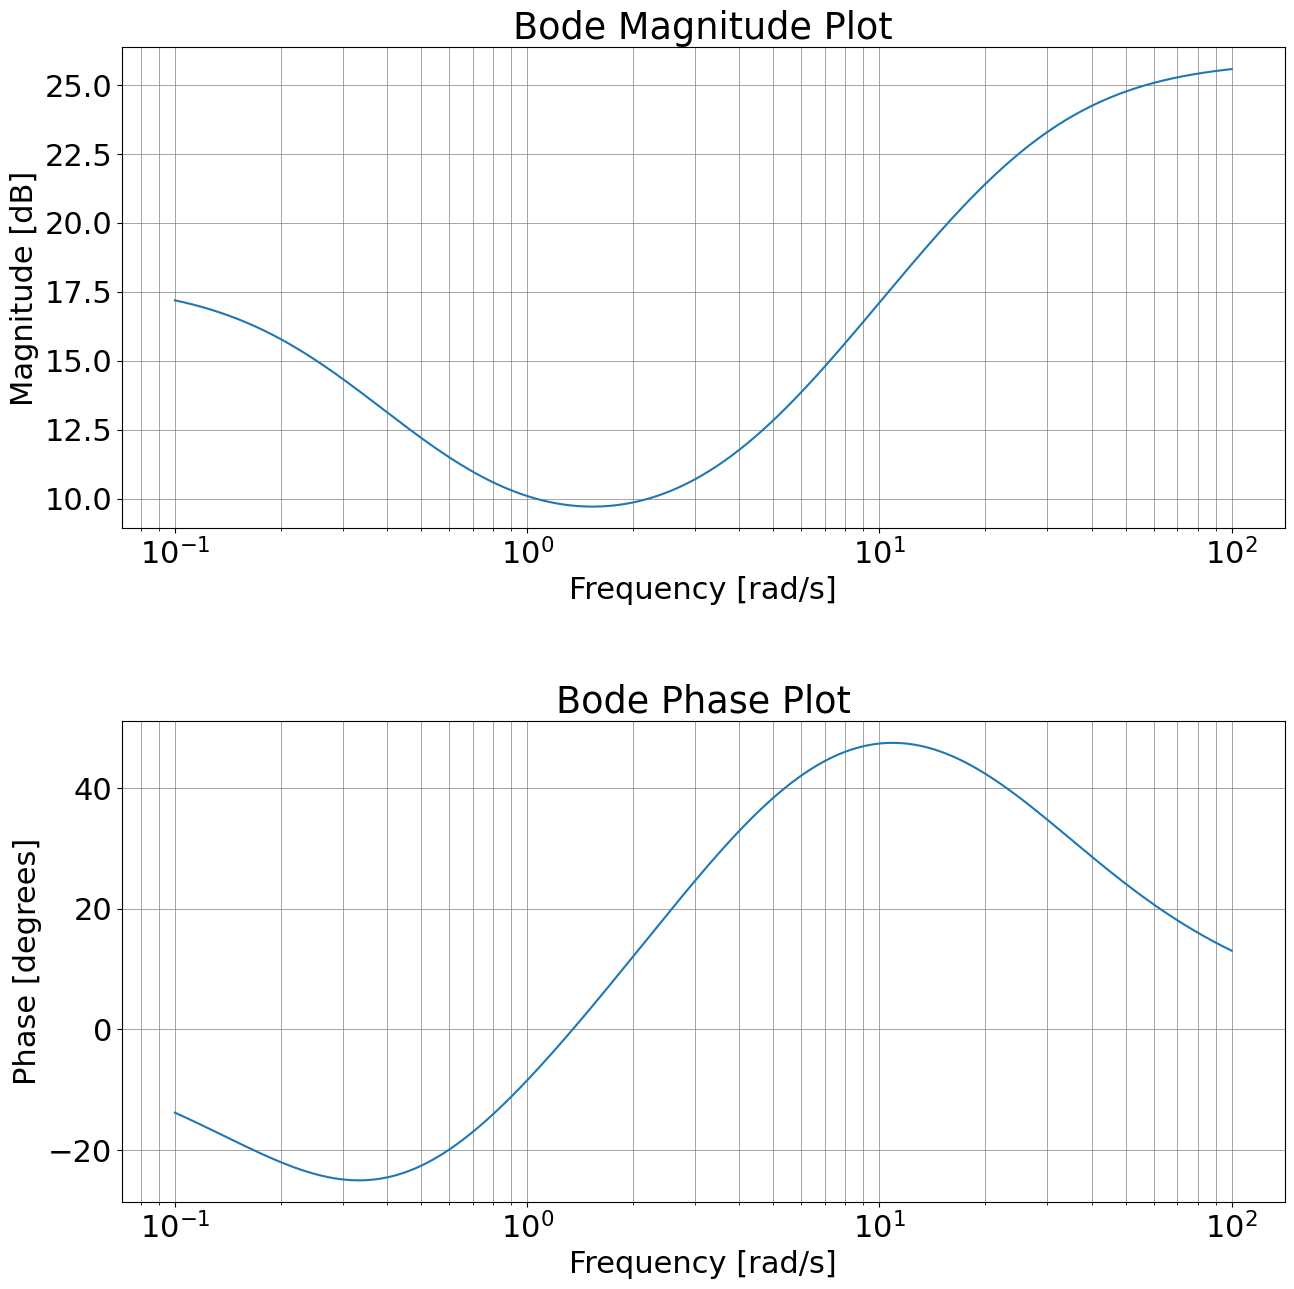

In [11]:
TD=0.275
alpha=0.132
beta=3
TI=1.44

lead = ctl.TransferFunction([TD, 1], [alpha*TD, 1])
lag = beta*ctl.TransferFunction([TI, 1], [beta*TI, 1])

print(Bode(lead))
print(Bode(lag))

bode = Bode(2.6*lead*lag, freq_range=[-1, 2])
bode.plot_bode()

# Problem 1

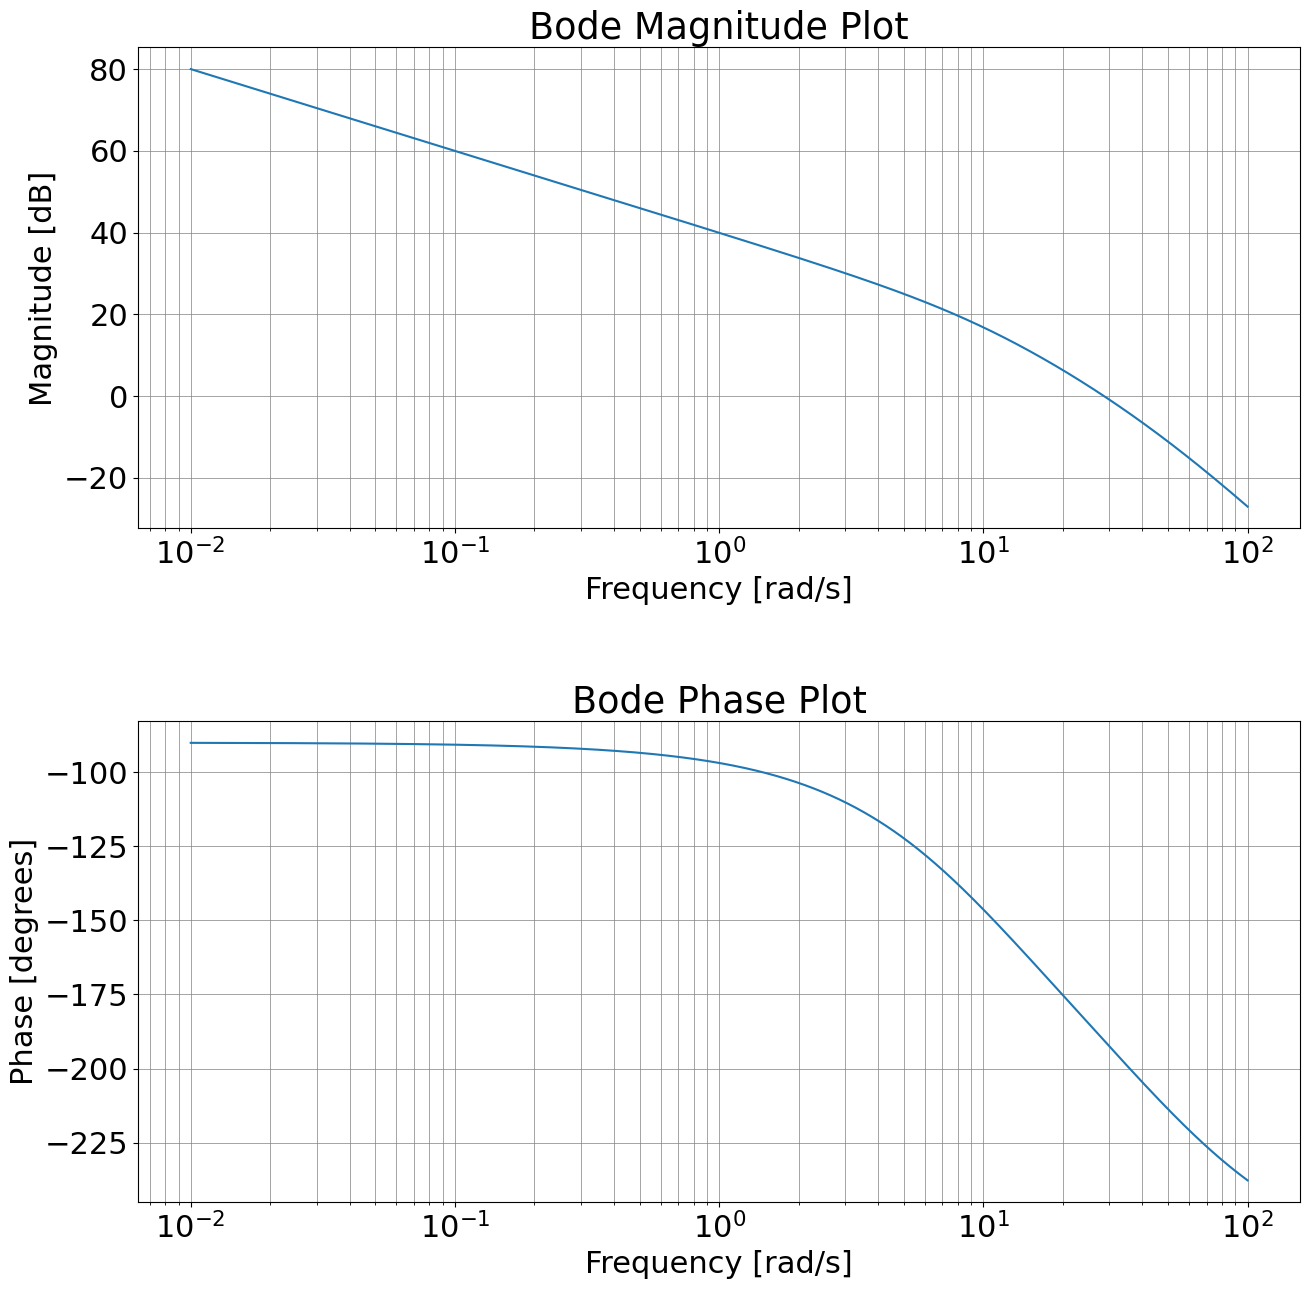

SYSTEM PROPERTIES for 
       5e+04
--------------------
s^3 + 60 s^2 + 500 s


w_BW = 33.69 rad/s
w_C = 28.80 rad/s
PM = -10.80 degrees


In [31]:
# Define transfer function coefficients
G = ctl.TransferFunction([50000], [1, 60, 500, 0])

bode = Bode(G)
bode.plot_bode(file_name='A4_imgs/q1_bode_nothing.png', plot=True)
print(bode)

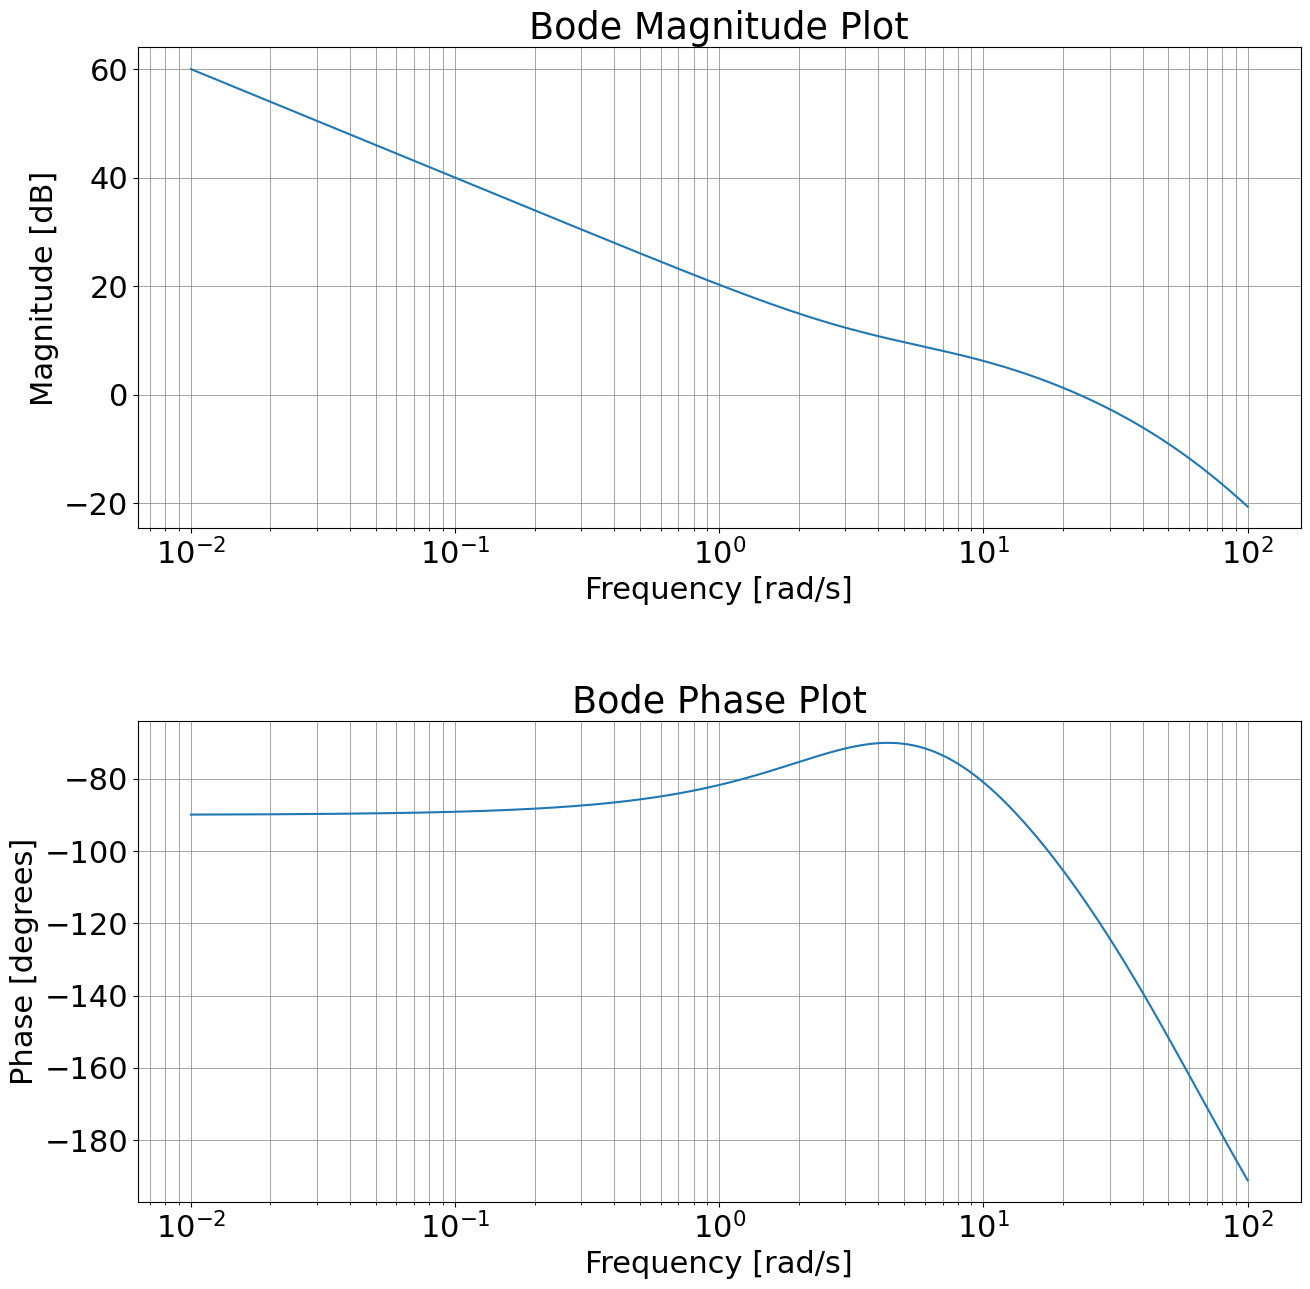

SYSTEM PROPERTIES for 
           1.4e+04 s + 5e+04
----------------------------------------
0.088 s^4 + 15.28 s^3 + 644 s^2 + 5000 s


w_BW = 31.30 rad/s
w_C = 23.30 rad/s
PM = 67.94 degrees


In [32]:
D = ctl.TransferFunction([0.28, 1], [0.0088, 1])/10
DG_bode = Bode(G*D)
DG_bode.plot_bode(file_name='A4_imgs/q1_bode_final.png', plot=True)
print(DG_bode)

# Problem 2

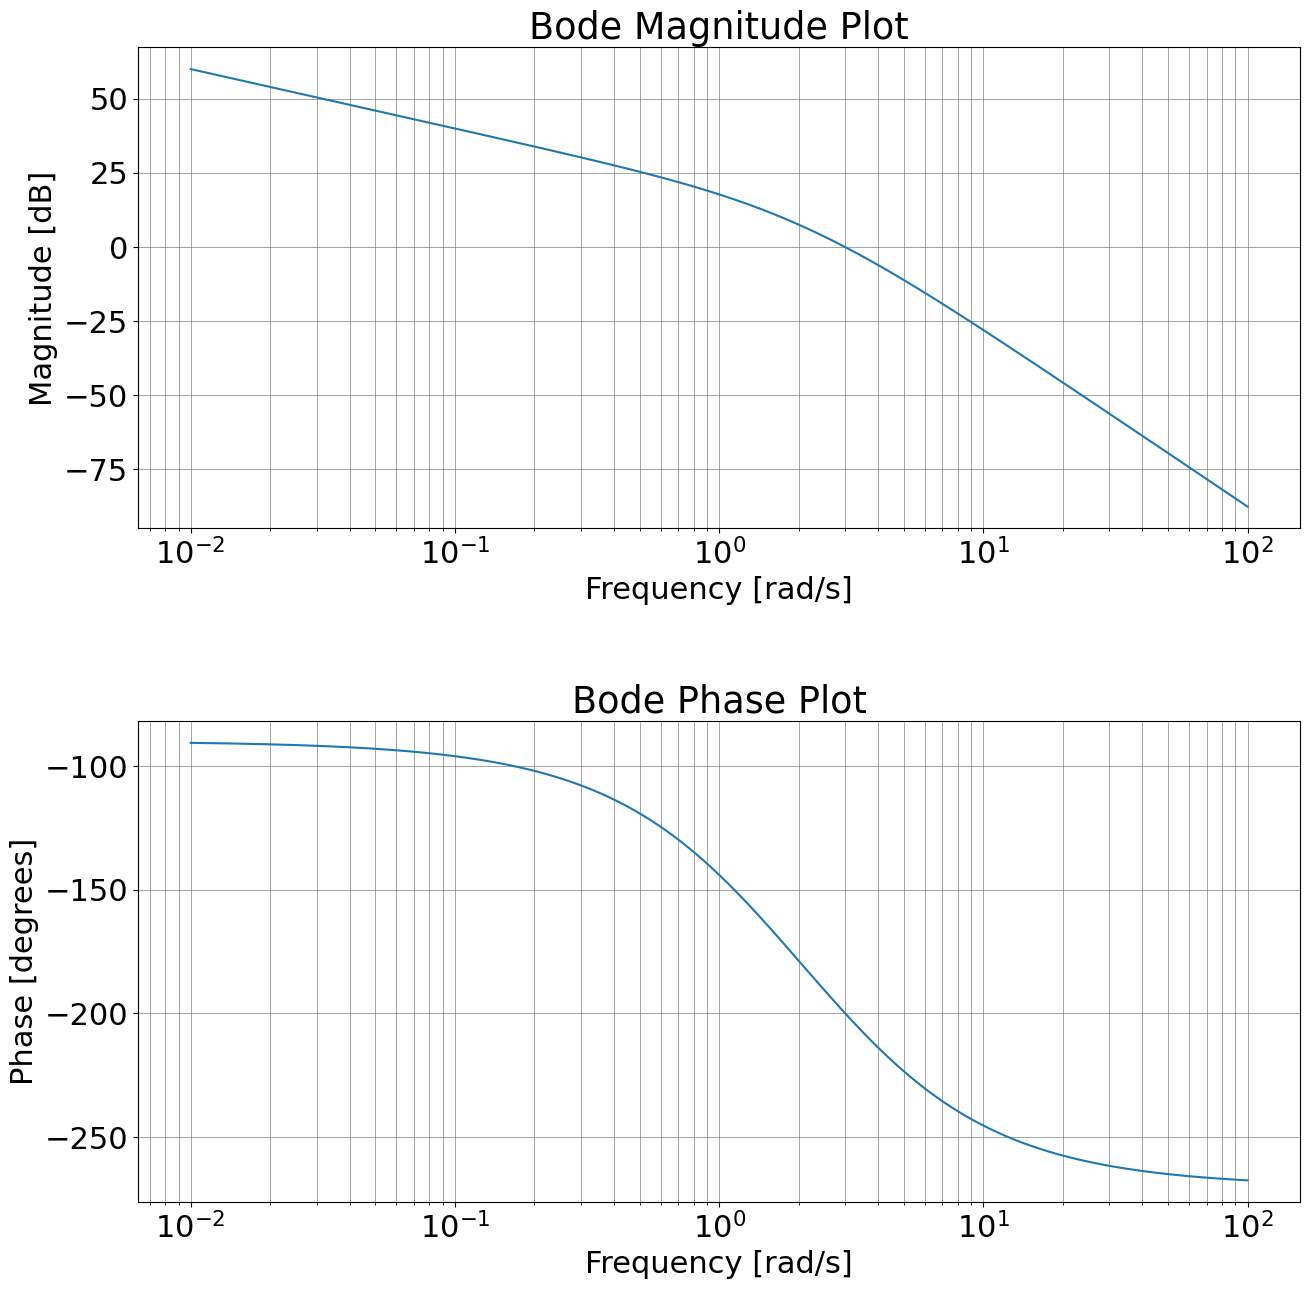

SYSTEM PROPERTIES for 
         210
---------------------
5 s^3 + 22 s^2 + 21 s


w_BW = 3.49 rad/s
w_C = 3.01 rad/s
PM = -20.14 degrees
0.8126619200091946
20.12719580781841


In [41]:
G = ctl.TransferFunction([210], [5, 22, 21, 0])
bode = Bode(G)
bode.plot_bode(file_name='A4_imgs/q2_bode_nothing.png', plot=True)
print(bode)
w0 = bode.w_at_phase(-180+45)
print(w0)
mag0 = bode.mag_at_w(w0)
print(mag0)

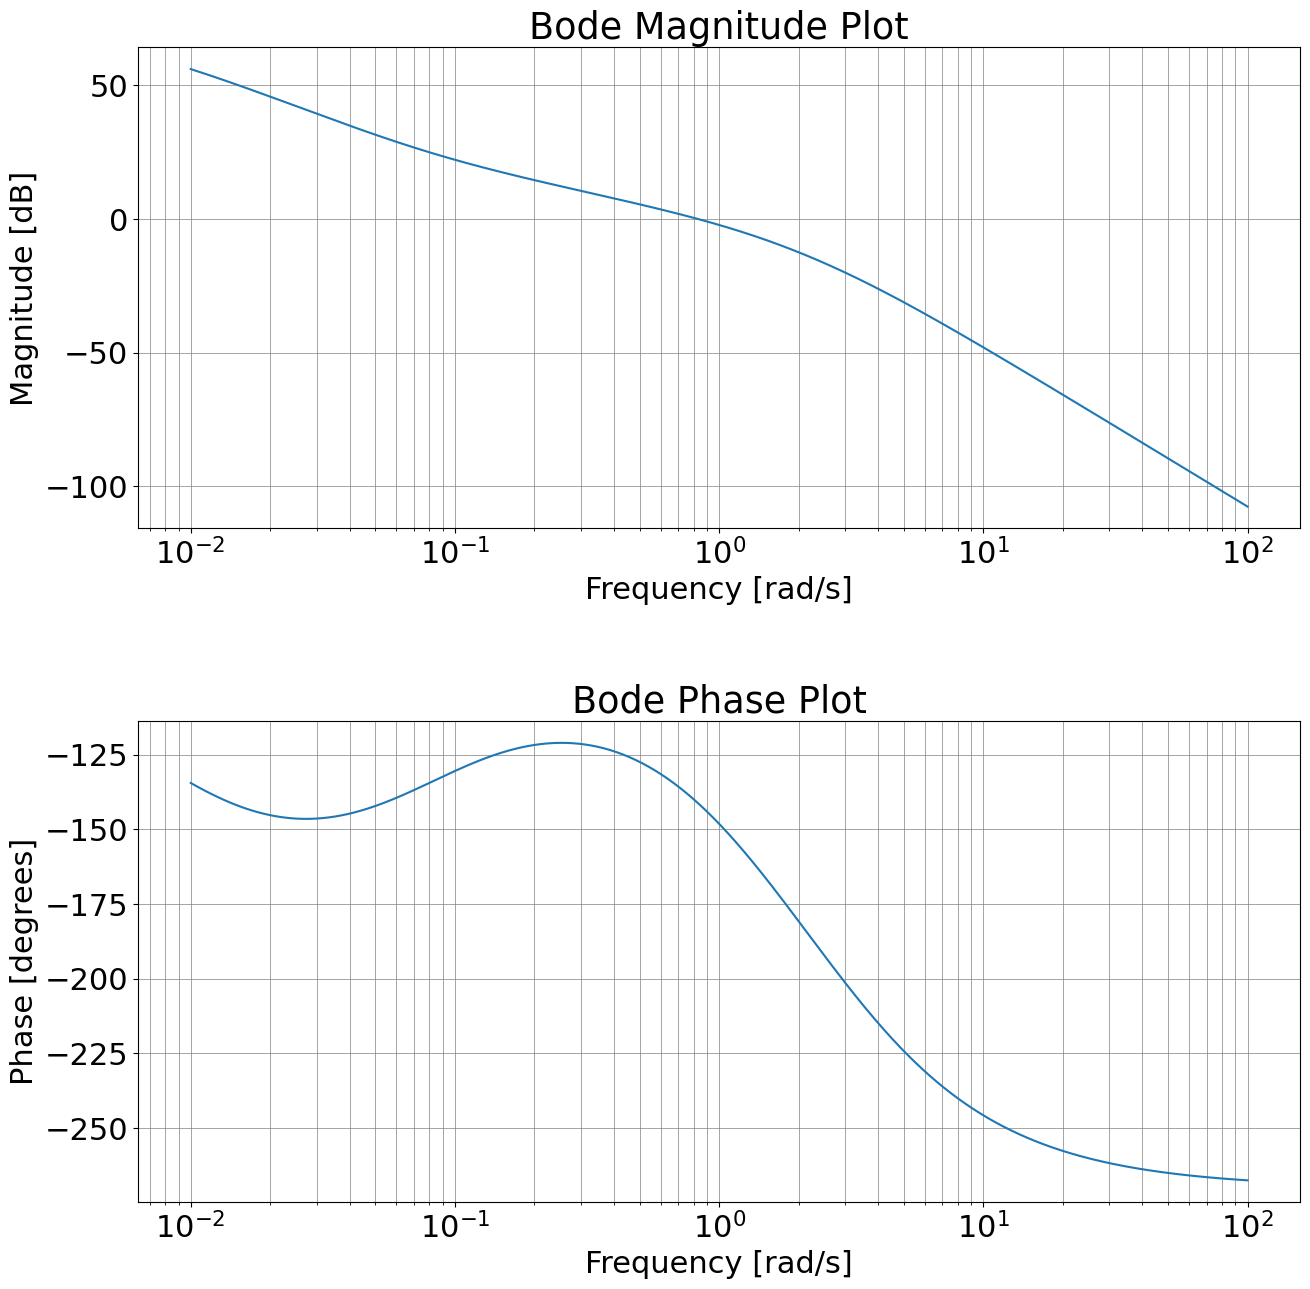

SYSTEM PROPERTIES for 
            2583 s + 210
------------------------------------
615 s^4 + 2711 s^3 + 2605 s^2 + 21 s


w_BW = 1.07 rad/s
w_C = 0.84 rad/s
PM = 38.61 degrees


In [43]:
D = ctl.TransferFunction([12.3, 1], [123, 1])
G = ctl.TransferFunction([210], [5, 22, 21, 0])

bode = Bode(D*G)
bode.plot_bode(file_name='A4_imgs/q2_bode_final.png', plot=True)
print(bode)

# Problem 3

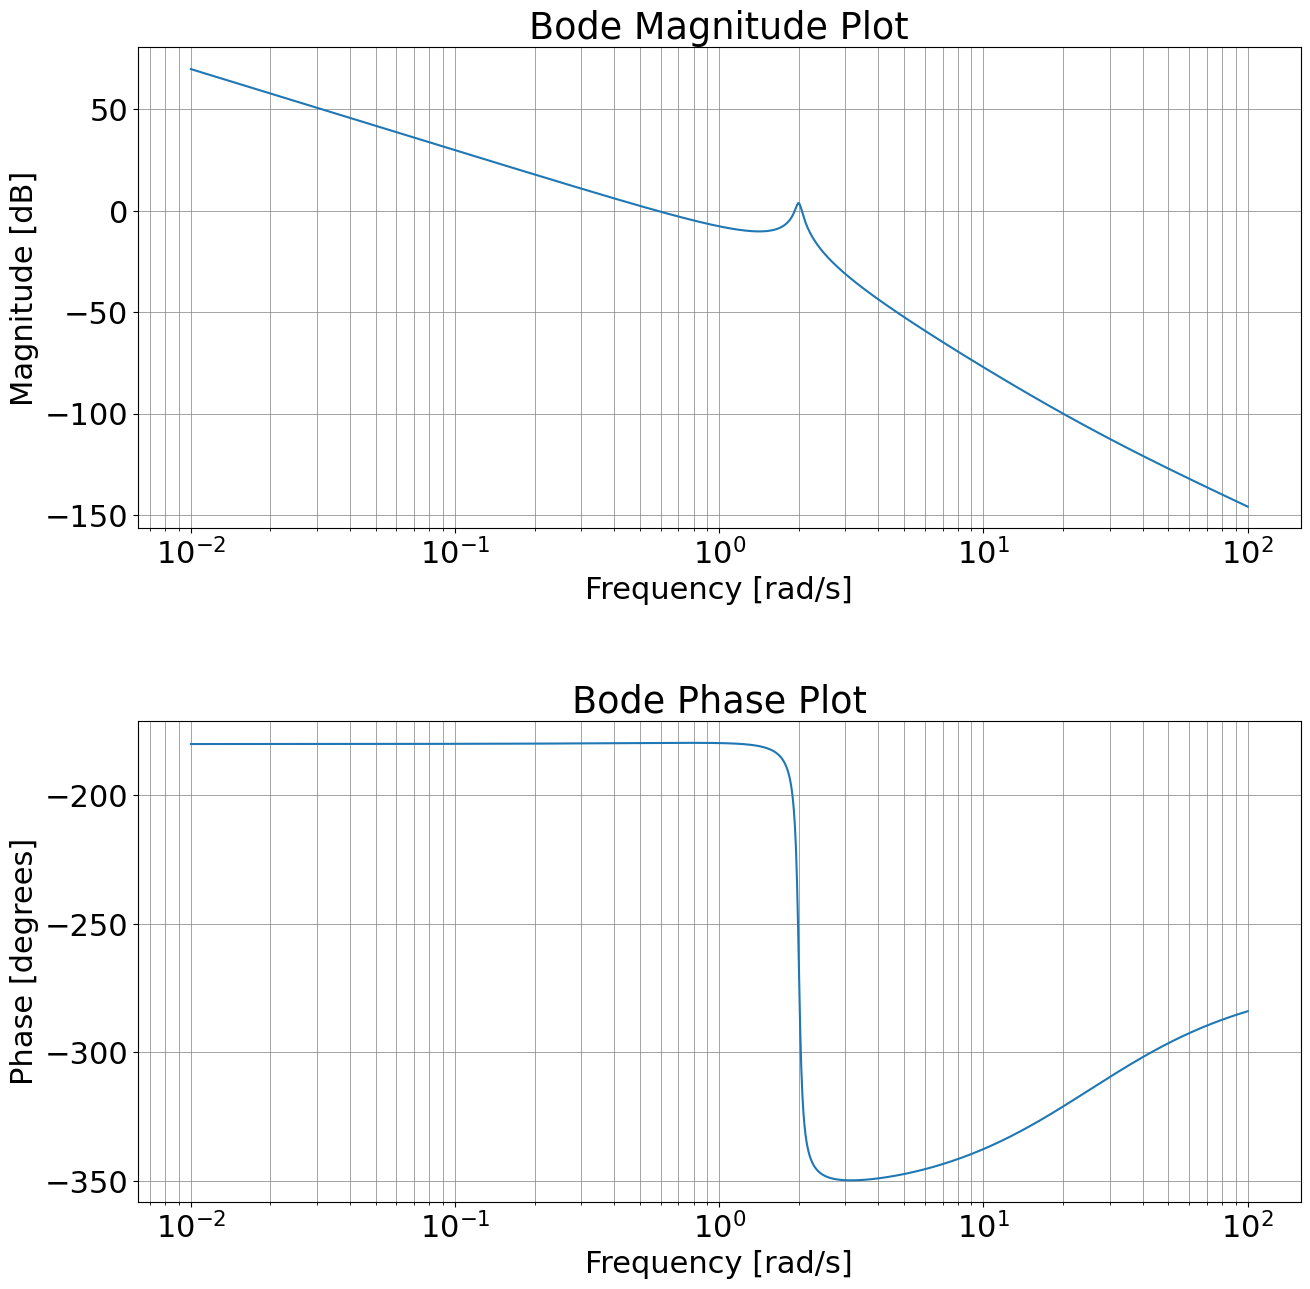

SYSTEM PROPERTIES for 
        s + 25
-----------------------
20 s^4 + 2 s^3 + 80 s^2


w_BW = 0.71 rad/s
w_C = 0.59 rad/s
PM = 0.43 degrees
GM = 9.57


In [52]:
G = ctl.TransferFunction([1, 25], [20, 2, 80, 0, 0])
bode = Bode(G)
bode.plot_bode(file_name='A4_imgs/q3_bode_nothing.png', plot=True)
print(bode)

# Problem 4

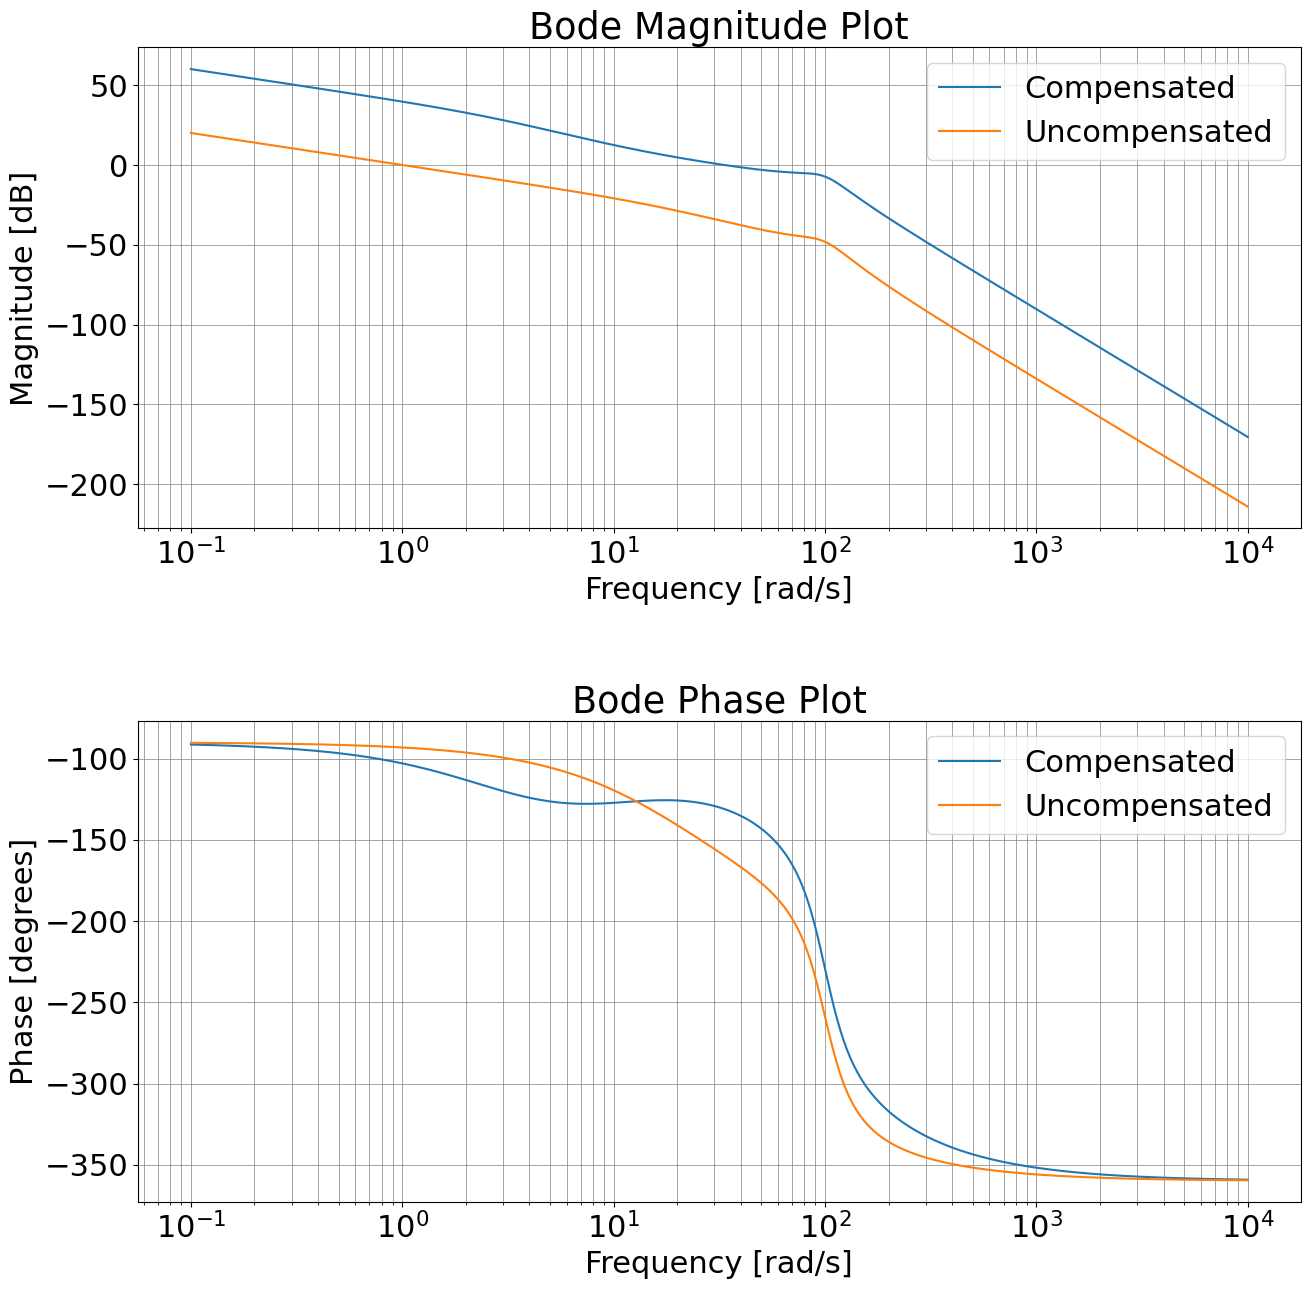

SYSTEM PROPERTIES for 
                        0.4802 s^2 + 14.61 s + 100
---------------------------------------------------------------------------
1.582e-08 s^6 + 2.74e-06 s^5 + 0.0002933 s^4 + 0.02147 s^3 + 0.3815 s^2 + s


w_BW = 49.62 rad/s
w_C = 33.38 rad/s
PM = 48.98 degrees
GM = 5.10
SYSTEM PROPERTIES for 
                   1
---------------------------------------
5e-06 s^4 + 0.00035 s^3 + 0.055 s^2 + s


w_BW = 1.41 rad/s
w_C = 1.00 rad/s
PM = 86.84 degrees
GM = 41.41


In [27]:
G = ctl.TransferFunction([1], [0.000005, 0.00035, 0.055, 1, 0])
D_lead = 30.5*ctl.TransferFunction([1/20, 1], [1/100, 1])
D_lag = 3.28*ctl.TransferFunction([0.096, 1], [1/3.16, 1])
DDG = D_lead*G*D_lag
compensated = DDG
compensated_num = compensated.num[0][0]
compensated_den = compensated.den[0][0]
compensated = signal.TransferFunction(compensated_num, compensated_den)

uncompensated = G
uncompensated_num = uncompensated.num[0][0]
uncompensated_den = uncompensated.den[0][0]
uncompensated = signal.TransferFunction(uncompensated_num, uncompensated_den)

w_comp, mag_comp, phase_comp = signal.bode(compensated, np.logspace(-1, 4, 1000))
w_uncomp, mag_uncomp, phase_uncomp = signal.bode(uncompensated, np.logspace(-1, 4, 1000))

# Plot the magnitude and phase of both on the same plot
plt.figure()
# reset settings
plt.rcParams.update(plt.rcParamsDefault)

# make plot bigger
plt.rcParams["figure.figsize"] = (15,15)

# make text bigger
plt.rcParams.update({'font.size': 22})

# Create Bode magnitude plot (subplot)
plt.subplot(2, 1, 1)
plt.semilogx(w_comp, mag_comp, label='Compensated')
plt.semilogx(w_uncomp, mag_uncomp, label='Uncompensated')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')

plt.title('Bode Magnitude Plot')
plt.grid(which='both', linestyle='-', linewidth='0.5', color='gray')
plt.legend()

# Create Bode phase plot (subplot)
plt.subplot(2, 1, 2)
plt.semilogx(w_comp, phase_comp, label='Compensated')
plt.semilogx(w_uncomp, phase_uncomp, label='Uncompensated')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.title('Bode Phase Plot')

plt.grid(which='both', linestyle='-', linewidth='0.5', color='gray')

plt.subplots_adjust(hspace=0.4)

plt.legend()

plt.savefig('A4_imgs/q4_bode_final.png')
plt.show()

bode_compensated = Bode(DDG)
bode_uncompensated = Bode(G)

print(bode_compensated)

print(bode_uncompensated)


# Problem 5

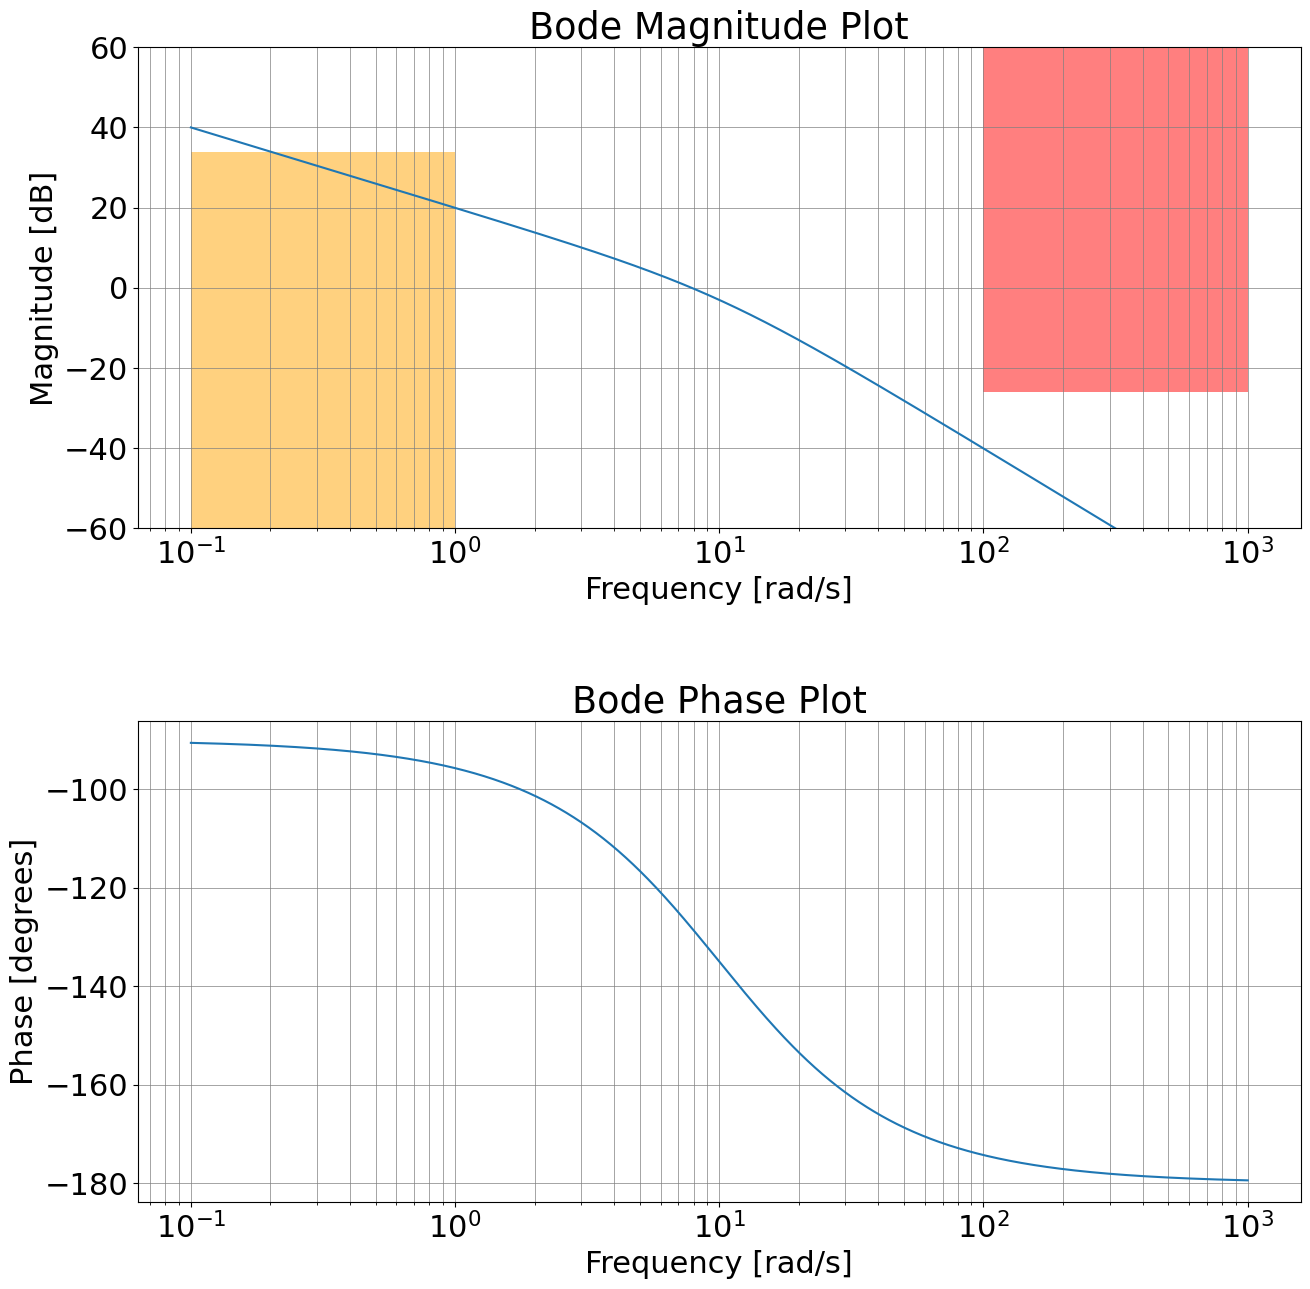

SYSTEM PROPERTIES for 
    10
-----------
0.1 s^2 + s


w_BW = 10.07 rad/s
w_C = 7.92 rad/s
PM = 51.61 degrees
GM = inf


In [95]:
G = ctl.TransferFunction([10], [1/10, 1, 0])
uncompensated = G
uncompensated_num = uncompensated.num[0][0]
uncompensated_den = uncompensated.den[0][0]
uncompensated = signal.TransferFunction(uncompensated_num, uncompensated_den)

w, mag, phase = signal.bode(uncompensated, np.logspace(-1, 3, 1000))

# Plot the magnitude and phase of both on the same plot
plt.figure()
# reset settings
plt.rcParams.update(plt.rcParamsDefault)

# make plot bigger
plt.rcParams["figure.figsize"] = (15,15)

# make text bigger
plt.rcParams.update({'font.size': 22})

# Create Bode magnitude plot (subplot)
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')

plt.title('Bode Magnitude Plot')
plt.grid(which='both', linestyle='-', linewidth='0.5', color='gray')

# max y to be 60 db
plt.ylim(-60, 60)

# Draw a region to highlight
# Get max y value of the grid

ymax = plt.ylim()[1]

# get min y value of the grid
ymin = plt.ylim()[0]

# Convert a y value to a fraction of the grid
# y = ymin ==> f = 0 and y = ymax ==> f = 1
def y2f(y):
    y = 20*np.log10(y)
    return (y - ymin) / (ymax - ymin)

plt.axvspan(100, 1000, ymin = y2f(0.05), facecolor='red', alpha=0.5)
plt.axvspan(0.1, 1, ymax = y2f(50), facecolor='orange', alpha=0.5)

# Create Bode phase plot (subplot)
plt.subplot(2, 1, 2)
plt.semilogx(w, phase)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.title('Bode Phase Plot')

plt.grid(which='both', linestyle='-', linewidth='0.5', color='gray')

plt.subplots_adjust(hspace=0.4)

plt.savefig('A4_imgs/q5_bode_nothing.png')
plt.show()

bode = Bode(G)

print(bode)

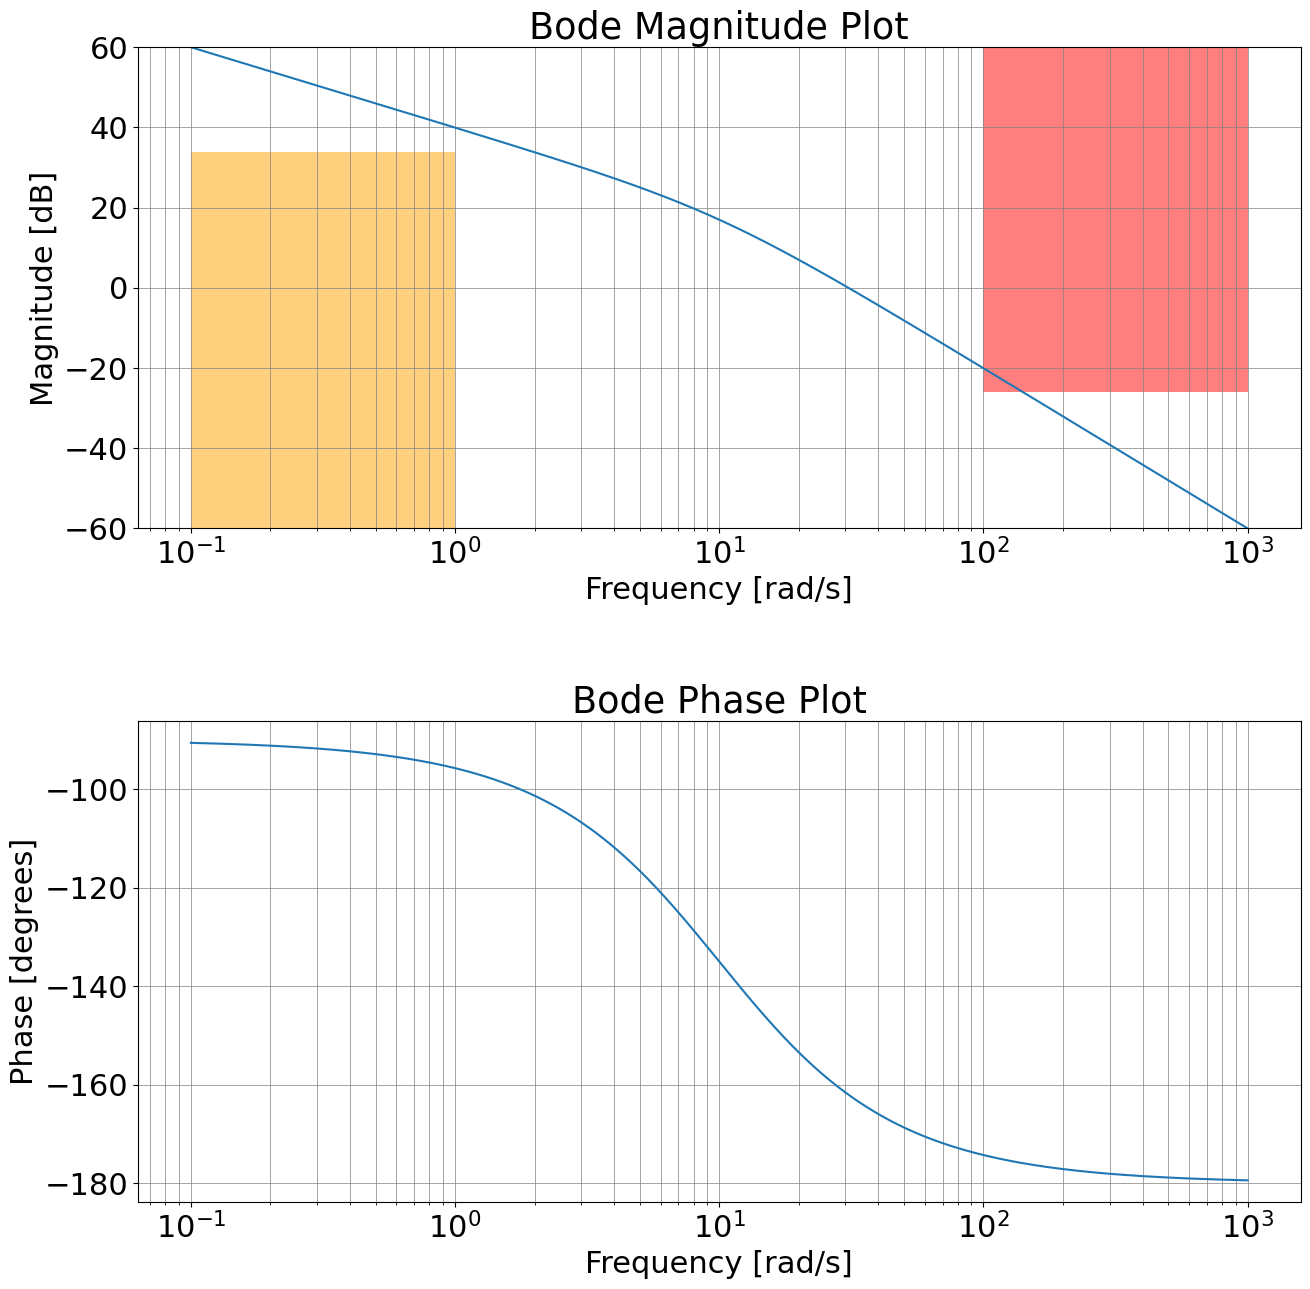

SYSTEM PROPERTIES for 
    100
-----------
0.1 s^2 + s


w_BW = 36.95 rad/s
w_C = 31.01 rad/s
PM = 17.87 degrees
GM = inf


In [94]:
G = ctl.TransferFunction([10], [1/10, 1, 0])*10
uncompensated = G
uncompensated_num = uncompensated.num[0][0]
uncompensated_den = uncompensated.den[0][0]
uncompensated = signal.TransferFunction(uncompensated_num, uncompensated_den)

w, mag, phase = signal.bode(uncompensated, np.logspace(-1, 3, 1000))

# Plot the magnitude and phase of both on the same plot
plt.figure()
# reset settings
plt.rcParams.update(plt.rcParamsDefault)

# make plot bigger
plt.rcParams["figure.figsize"] = (15,15)

# make text bigger
plt.rcParams.update({'font.size': 22})

# Create Bode magnitude plot (subplot)
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')

plt.title('Bode Magnitude Plot')
plt.grid(which='both', linestyle='-', linewidth='0.5', color='gray')

# max y to be 60 db
plt.ylim(-60, 60)

# Draw a region to highlight
# Get max y value of the grid

ymax = plt.ylim()[1]

# get min y value of the grid
ymin = plt.ylim()[0]

# Convert a y value to a fraction of the grid
# y = ymin ==> f = 0 and y = ymax ==> f = 1
def y2f(y):
    y = 20*np.log10(y)
    return (y - ymin) / (ymax - ymin)

plt.axvspan(100, 1000, ymin = y2f(0.05), facecolor='red', alpha=0.5)
plt.axvspan(0.1, 1, ymax = y2f(50), facecolor='orange', alpha=0.5)

# Create Bode phase plot (subplot)
plt.subplot(2, 1, 2)
plt.semilogx(w, phase)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.title('Bode Phase Plot')

plt.grid(which='both', linestyle='-', linewidth='0.5', color='gray')

plt.subplots_adjust(hspace=0.4)

plt.savefig('A4_imgs/q5_bode_b.png')
plt.show()

bode = Bode(G)

print(bode)

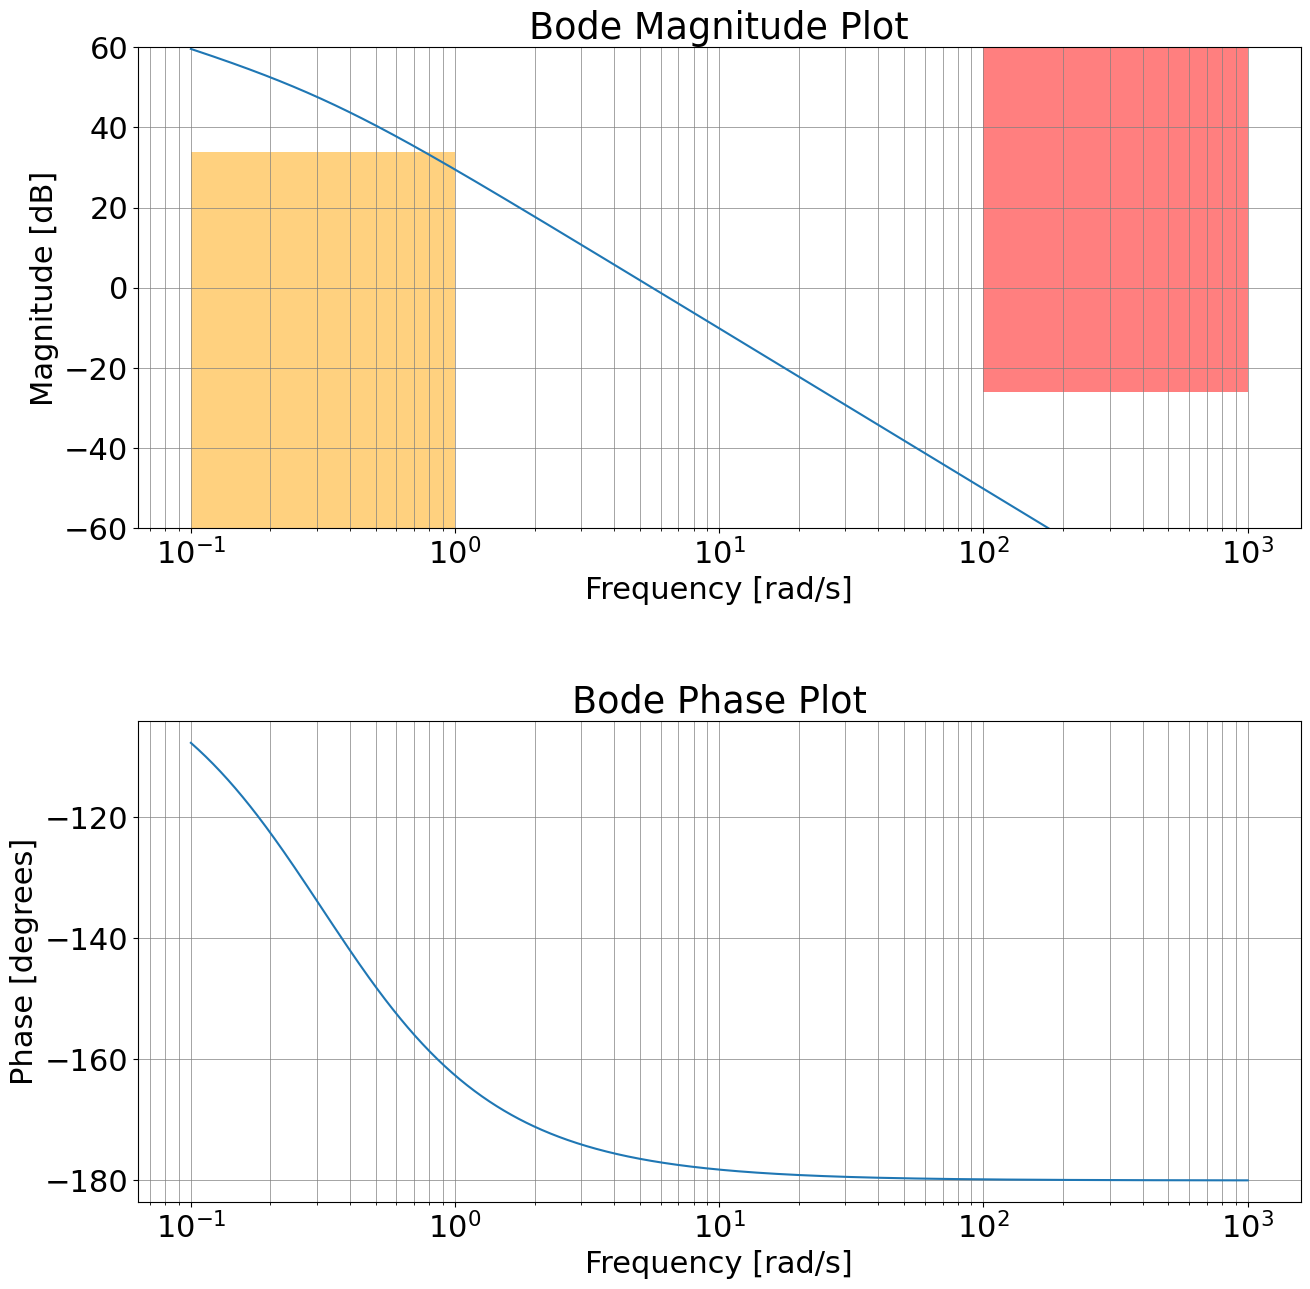

SYSTEM PROPERTIES for 
      10 s + 100
----------------------
0.32 s^3 + 3.3 s^2 + s


w_BW = 6.65 rad/s
w_C = 5.63 rad/s
PM = 3.18 degrees
GM = inf


In [106]:
G = ctl.TransferFunction([10], [1/10, 1, 0])*10
D = ctl.TransferFunction([0.1, 1], [3.2, 1])
uncompensated = G*D
uncompensated_num = uncompensated.num[0][0]
uncompensated_den = uncompensated.den[0][0]
uncompensated = signal.TransferFunction(uncompensated_num, uncompensated_den)

w, mag, phase = signal.bode(uncompensated, np.logspace(-1, 3, 1000))

# Plot the magnitude and phase of both on the same plot
plt.figure()
# reset settings
plt.rcParams.update(plt.rcParamsDefault)

# make plot bigger
plt.rcParams["figure.figsize"] = (15,15)

# make text bigger
plt.rcParams.update({'font.size': 22})

# Create Bode magnitude plot (subplot)
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')

plt.title('Bode Magnitude Plot')
plt.grid(which='both', linestyle='-', linewidth='0.5', color='gray')

# max y to be 60 db
plt.ylim(-60, 60)

# Draw a region to highlight
# Get max y value of the grid

ymax = plt.ylim()[1]

# get min y value of the grid
ymin = plt.ylim()[0]

# Convert a y value to a fraction of the grid
# y = ymin ==> f = 0 and y = ymax ==> f = 1
def y2f(y):
    y = 20*np.log10(y)
    return (y - ymin) / (ymax - ymin)

plt.axvspan(100, 1000, ymin = y2f(0.05), facecolor='red', alpha=0.5)
plt.axvspan(0.1, 1, ymax = y2f(50), facecolor='orange', alpha=0.5)

# Create Bode phase plot (subplot)
plt.subplot(2, 1, 2)
plt.semilogx(w, phase)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.title('Bode Phase Plot')

plt.grid(which='both', linestyle='-', linewidth='0.5', color='gray')

plt.subplots_adjust(hspace=0.4)

plt.savefig('A4_imgs/q5_bode_d_1.png')
plt.show()

bode = Bode(G*D)

print(bode)

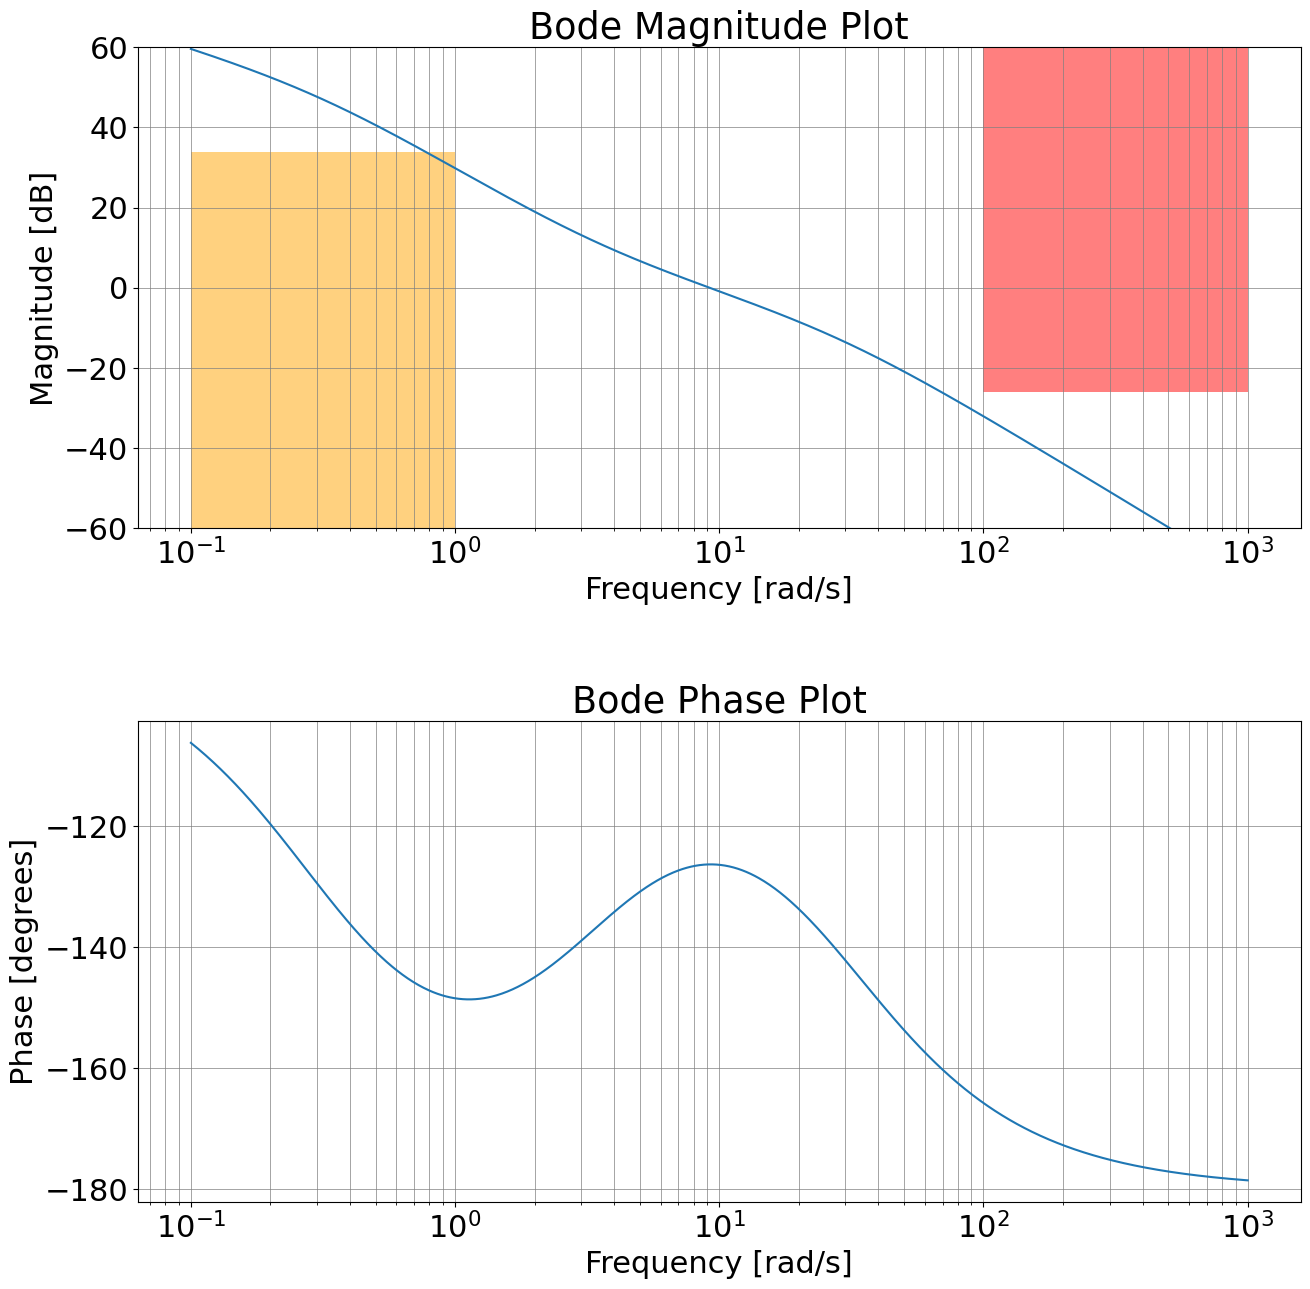

SYSTEM PROPERTIES for 
          2.9 s^2 + 39 s + 100
----------------------------------------
0.01114 s^4 + 0.4348 s^3 + 3.335 s^2 + s


w_BW = 12.33 rad/s
w_C = 9.27 rad/s
PM = 53.65 degrees
GM = inf
29.764312040579224


In [110]:
G = ctl.TransferFunction([10], [1/10, 1, 0])*10
D = ctl.TransferFunction([0.1, 1], [3.2, 1]) * ctl.TransferFunction([0.29, 1],[0.29*0.12, 1])
uncompensated = G*D
uncompensated_num = uncompensated.num[0][0]
uncompensated_den = uncompensated.den[0][0]
uncompensated = signal.TransferFunction(uncompensated_num, uncompensated_den)

w, mag, phase = signal.bode(uncompensated, np.logspace(-1, 3, 1000))

# Plot the magnitude and phase of both on the same plot
plt.figure()
# reset settings
plt.rcParams.update(plt.rcParamsDefault)

# make plot bigger
plt.rcParams["figure.figsize"] = (15,15)

# make text bigger
plt.rcParams.update({'font.size': 22})

# Create Bode magnitude plot (subplot)
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')

plt.title('Bode Magnitude Plot')
plt.grid(which='both', linestyle='-', linewidth='0.5', color='gray')

# max y to be 60 db
plt.ylim(-60, 60)

# Draw a region to highlight
# Get max y value of the grid

ymax = plt.ylim()[1]

# get min y value of the grid
ymin = plt.ylim()[0]

# Convert a y value to a fraction of the grid
# y = ymin ==> f = 0 and y = ymax ==> f = 1
def y2f(y):
    y = 20*np.log10(y)
    return (y - ymin) / (ymax - ymin)

plt.axvspan(100, 1000, ymin = y2f(0.05), facecolor='red', alpha=0.5)
plt.axvspan(0.1, 1, ymax = y2f(50), facecolor='orange', alpha=0.5)

# Create Bode phase plot (subplot)
plt.subplot(2, 1, 2)
plt.semilogx(w, phase)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.title('Bode Phase Plot')

plt.grid(which='both', linestyle='-', linewidth='0.5', color='gray')

plt.subplots_adjust(hspace=0.4)

plt.savefig('A4_imgs/q5_bode_d_2.png')
plt.show()

bode = Bode(G*D)

print(bode)
print(bode.mag_at_w(1))

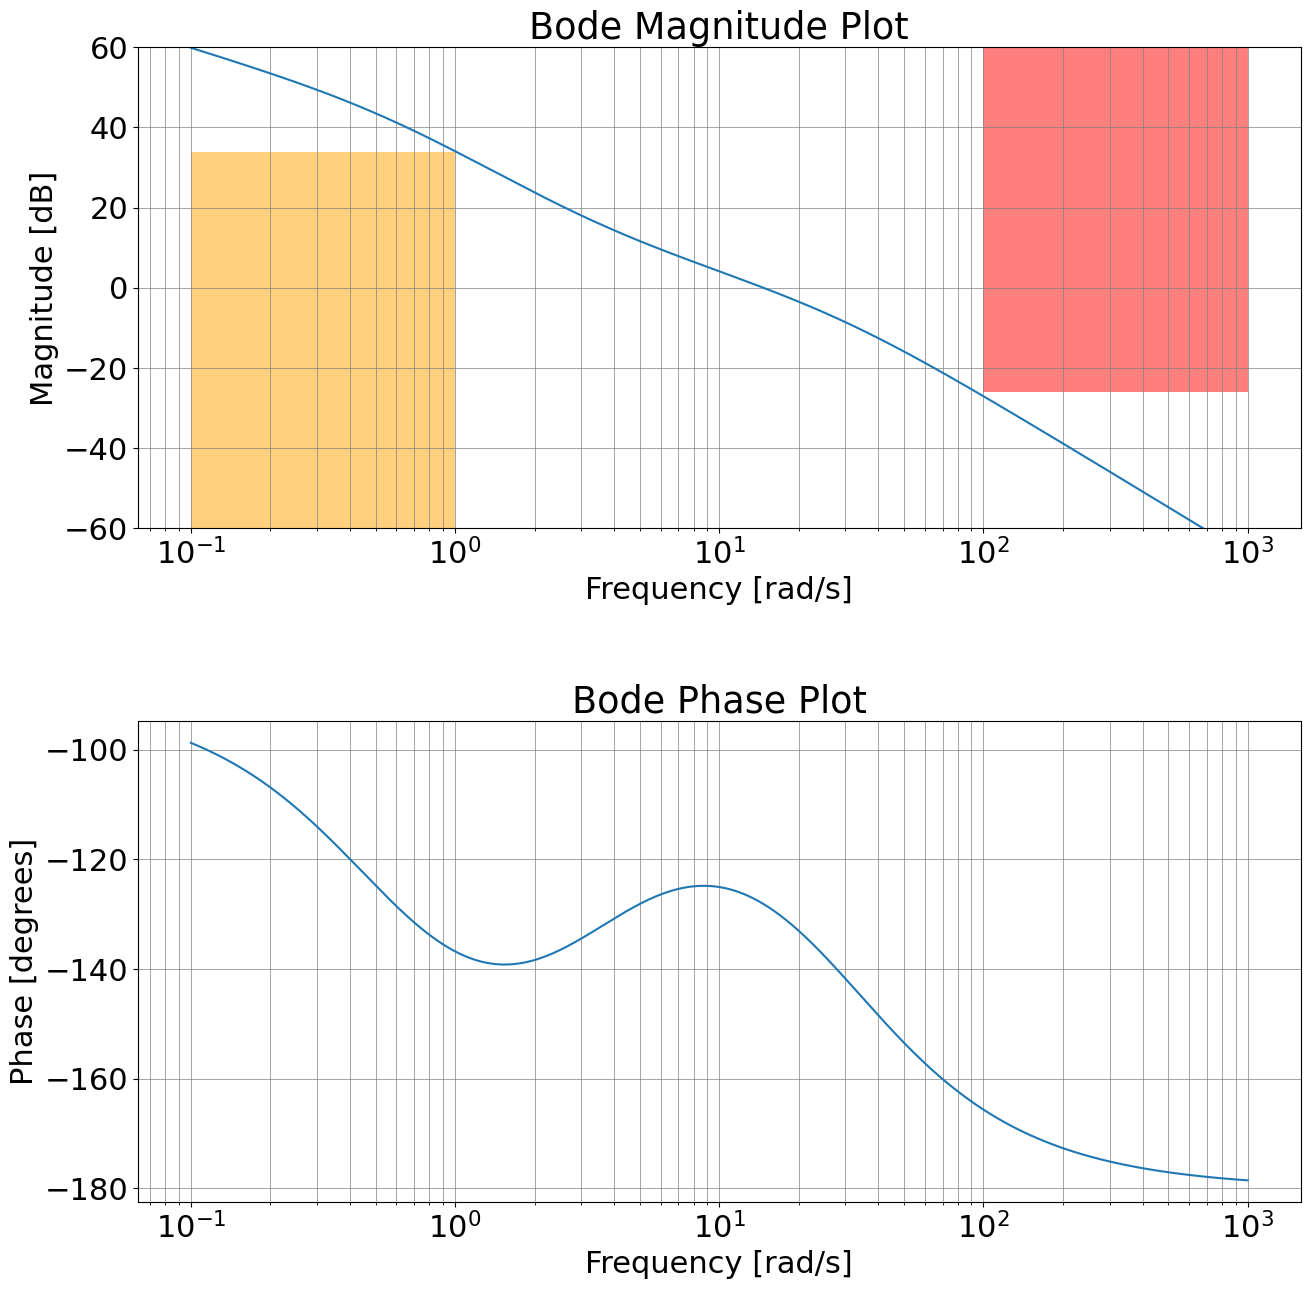

SYSTEM PROPERTIES for 
          2.9 s^2 + 39 s + 100
-----------------------------------------
0.006264 s^4 + 0.2461 s^3 + 1.935 s^2 + s


w_BW = 19.33 rad/s
w_C = 14.80 rad/s
PM = 51.79 degrees
GM = inf
34.037984038987744
-27.144259814420117


In [113]:
G = ctl.TransferFunction([10], [1/10, 1, 0])*10
D = ctl.TransferFunction([0.1, 1], [1.8, 1]) * ctl.TransferFunction([0.29, 1],[0.29*0.12, 1])
uncompensated = G*D
uncompensated_num = uncompensated.num[0][0]
uncompensated_den = uncompensated.den[0][0]
uncompensated = signal.TransferFunction(uncompensated_num, uncompensated_den)

w, mag, phase = signal.bode(uncompensated, np.logspace(-1, 3, 1000))

# Plot the magnitude and phase of both on the same plot
plt.figure()
# reset settings
plt.rcParams.update(plt.rcParamsDefault)

# make plot bigger
plt.rcParams["figure.figsize"] = (15,15)

# make text bigger
plt.rcParams.update({'font.size': 22})

# Create Bode magnitude plot (subplot)
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')

plt.title('Bode Magnitude Plot')
plt.grid(which='both', linestyle='-', linewidth='0.5', color='gray')

# max y to be 60 db
plt.ylim(-60, 60)

# Draw a region to highlight
# Get max y value of the grid

ymax = plt.ylim()[1]

# get min y value of the grid
ymin = plt.ylim()[0]

# Convert a y value to a fraction of the grid
# y = ymin ==> f = 0 and y = ymax ==> f = 1
def y2f(y):
    y = 20*np.log10(y)
    return (y - ymin) / (ymax - ymin)

plt.axvspan(100, 1000, ymin = y2f(0.05), facecolor='red', alpha=0.5)
plt.axvspan(0.1, 1, ymax = y2f(50), facecolor='orange', alpha=0.5)

# Create Bode phase plot (subplot)
plt.subplot(2, 1, 2)
plt.semilogx(w, phase)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.title('Bode Phase Plot')

plt.grid(which='both', linestyle='-', linewidth='0.5', color='gray')

plt.subplots_adjust(hspace=0.4)

plt.savefig('A4_imgs/q5_bode_d_3.png')
plt.show()

bode = Bode(G*D, freq_range=[-1,3])

print(bode)
print(bode.mag_at_w(1))
print(bode.mag_at_w(100))

In [114]:
D

TransferFunction(array([0.029, 0.39 , 1.   ]), array([0.06264, 1.8348 , 1.     ]))